<a href="https://colab.research.google.com/github/HoangVo-Prog/Natural-language-processing-with-transformers/blob/main/Chapter_2_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q -U transformers datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 12.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platf

In [2]:
from datasets import load_dataset

emotions = load_dataset("dair-ai/emotion")
emotions

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/9.05k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [3]:
from transformers import AutoTokenizer

model_ckpt = "distilbert-base-cased" # same, be remain case-sensitivity
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/465 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [4]:
def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True) # Load from the pretrain model

emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)
print(emotions_encoded["train"].column_names)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

['text', 'label', 'input_ids', 'attention_mask']


In [5]:
import torch
from transformers import AutoModel


model_ckpt = "distilbert-base-cased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/263M [00:00<?, ?B/s]

In [6]:
emotions_encoded.set_format("torch",
                            columns=["input_ids", "attention_mask", "label"])

In [ ]:
# def extract_hidden_states(batch):
#     # Place model inputs on the GPU
#     inputs = {k:v.to(device) for k,v in batch.items() if k in tokenizer.model_input_names}
#     # Extract last hidden states
#     print(1)
#     with torch.no_grad():
#         # print(type(model(**inputs).last_hidden_state))
#         last_hidden_state = model(**inputs).last_hidden_state
#     # Return vector for [CLS] token
#     return {"hidden_state": last_hidden_state[:, 0].cpu().numpy()}

# emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)



# """
# ValueError: Unable to avoid copy while creating an array as requested.
# If using `np.array(obj, copy=False)` replace it with `np.asarray(obj)` to allow a copy when needed (no behavior change in NumPy 1.x).
# For more details, see https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword.
# """

In [7]:
import numpy as np
import torch
from tqdm import tqdm
from datasets import Dataset

# Ensure you're using the correct device (GPU if available, otherwise CPU)
device = "cuda" if torch.cuda.is_available() else "cpu"

# Function to extract hidden states for a batch (only [CLS] token)
def extract_hidden_states(batch):
    # Ensure the batch data is properly moved to the device (GPU or CPU)
    inputs = {k: torch.tensor(v).to(device) if isinstance(v, list) else v.to(device)
              for k, v in batch.items() if k in tokenizer.model_input_names}

    # Run the model with no gradient calculation
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state


    return {"hidden_state": last_hidden_state[:, 0].cpu().numpy()}

# Function to process each split (train, test, validation) and return hidden states
def extract_hidden_states_for_split(dataset_split):
    all_hidden_states = []
    batch_size = 32  # You can adjust this depending on your GPU memory
    num_samples = len(dataset_split)

    for i in tqdm(range(0, num_samples, batch_size)):
        # Select a batch of data (using select to get a subset)
        batch = dataset_split.select(range(i, min(i + batch_size, num_samples)))

        # Convert to dictionary and process the batch
        batch_dict = batch.to_dict()  # Convert to dictionary for easy access to tensors
        hidden_states_batch = extract_hidden_states(batch_dict)

        # Append the hidden states for this batch
        all_hidden_states.extend(hidden_states_batch['hidden_state'])

    # Ensure that the length of hidden_state matches the number of rows in the original dataset
    assert len(all_hidden_states) == num_samples, f"Mismatch in length: {len(all_hidden_states)} vs {num_samples}"

    # Return the hidden states (don't modify the original dataset)
    return all_hidden_states

# Apply the hidden state extraction to each split (train, test, validation)
train_hidden_states = extract_hidden_states_for_split(emotions_encoded['train'])
test_hidden_states = extract_hidden_states_for_split(emotions_encoded['test'])
validation_hidden_states = extract_hidden_states_for_split(emotions_encoded['validation'])

# Now, let's add the hidden states to the original dataset
def add_hidden_state_to_original(dataset_split, hidden_states):
    # Convert the original dataset to a dictionary and add the hidden state as a new column
    dataset_dict = dataset_split.to_dict()
    dataset_dict["hidden_state"] = hidden_states  # Add the hidden state column
    # Convert back to Dataset
    return Dataset.from_dict(dataset_dict)

# Apply the function to each split (train, test, validation)
emotions_hidden_train = add_hidden_state_to_original(emotions_encoded['train'], train_hidden_states)
emotions_hidden_test = add_hidden_state_to_original(emotions_encoded['test'], test_hidden_states)
emotions_hidden_validation = add_hidden_state_to_original(emotions_encoded['validation'], validation_hidden_states)

# Now emotions_hidden_train, emotions_hidden_test, and emotions_hidden_validation contain the hidden state
print("Hidden states added to the original dataset splits.")

# Combine all splits into a single DatasetDict
emotions_hidden = {
    "train": emotions_hidden_train,
    "test": emotions_hidden_test,
    "validation": emotions_hidden_validation
}

100%|██████████| 63/63 [00:03<00:00, 16.55it/s]


Hidden states added to the original dataset splits.


In [8]:
emotions_hidden["train"].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

In [9]:
X_train = np.array(emotions_hidden["train"]["hidden_state"])
X_valid = np.array(emotions_hidden["validation"]["hidden_state"])
y_train = np.array(emotions_hidden["train"]["label"])
y_valid = np.array(emotions_hidden["validation"]["label"])
X_train.shape, X_valid.shape

((16000, 768), (2000, 768))

In [ ]:
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Scale features to [0,1] range
X_scaled = MinMaxScaler().fit_transform(X_train)
# Initialize and fit UMAP
mapper = UMAP(n_components=2, metric="cosine").fit(X_scaled)
# Create a DataFrame of 2D embeddings
df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])
df_emb["label"] = y_train
df_emb.head()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,X,Y,label
0,10.073597,-3.837794,0
1,13.170424,-0.152638,0
2,10.306499,-1.149862,3
3,9.911228,-1.236817,2
4,14.365762,-0.576859,3


In [ ]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_valid, y_valid)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.637

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid)

0.352

In [10]:
from transformers import AutoModelForSequenceClassification

num_labels = 6
model = (AutoModelForSequenceClassification
         .from_pretrained(model_ckpt, num_labels=num_labels)
         .to(device))

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [11]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

In [12]:
from huggingface_hub import notebook_login

notebook_login()

In [13]:
from transformers import Trainer, TrainingArguments

batch_size = 64
logging_steps = len(emotions_encoded["train"]) // batch_size
model_name = f"{model_ckpt}-finetuned-emotion"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=1,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  eval_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=True,
                                  log_level="error")

In [15]:
from transformers import Trainer, AutoProcessor

trainer = Trainer(
    model=model,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=emotions_encoded["train"],
    eval_dataset=emotions_encoded["validation"],
    processing_class=tokenizer
)

trainer.train()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: vohoang2204 (vohoang2204-unversity-of-science) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.829300,0.415065,0.883000,0.879717


TrainOutput(global_step=250, training_loss=0.82926025390625, metrics={'train_runtime': 137.5044, 'train_samples_per_second': 116.36, 'train_steps_per_second': 1.818, 'total_flos': 389150741376000.0, 'train_loss': 0.82926025390625, 'epoch': 1.0})

In [16]:
trainer.push_to_hub(commit_message="Training completed!")

events.out.tfevents.1744902835.1b6c9a13d2b3.1091.1:   0%|          | 0.00/6.14k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/HoAgG/distilbert-base-cased-finetuned-emotion/commit/c65f89c4979b5ca72fedca63f95408f4d50947a7', commit_message='Training completed!', commit_description='', oid='c65f89c4979b5ca72fedca63f95408f4d50947a7', pr_url=None, repo_url=RepoUrl('https://huggingface.co/HoAgG/distilbert-base-cased-finetuned-emotion', endpoint='https://huggingface.co', repo_type='model', repo_id='HoAgG/distilbert-base-cased-finetuned-emotion'), pr_revision=None, pr_num=None)

In [25]:
from transformers import pipeline

# Change 'transfromersbook' to your Hub username

model_id = "HoAgG/distilbert-base-cased-finetuned-emotion"
classifier = pipeline("text-classification", model=model_id)

custom_tweet = "I saw a movie today and it was really good"
preds = classifier(custom_tweet, return_all_scores=True)

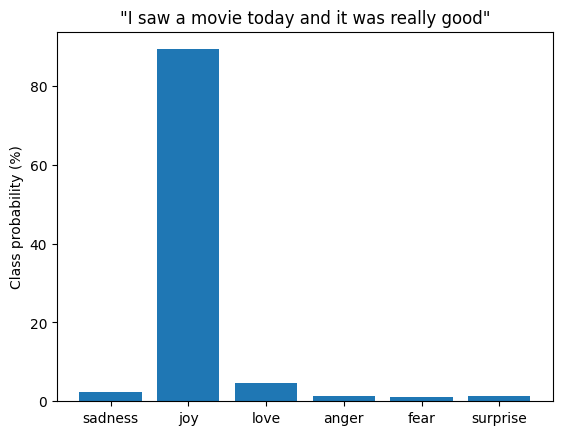

In [26]:
# Plot the probability of each class
import pandas as pd
from matplotlib import pyplot as plt

labels = ["sadness", "joy", "love", "anger", "fear", "surprise"]

preds_df = pd.DataFrame(preds[0])
plt.bar(labels, 100 * preds_df["score"], color='C0')
plt.title(f'"{custom_tweet}"')
plt.ylabel("Class probability (%)")
plt.show()